# Linear Regression Assignment

## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the data

In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing warnings library

import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing and reading the dataset

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape of the dataset

bike.shape

(730, 16)

In [5]:
# checking the statistical summary

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# printing the concise summary of the dataset which will include if it has any null values and incorrect data types

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Visualising the Data

### Distribution of bike rentals vs. two year period

<Figure size 7200x3600 with 0 Axes>

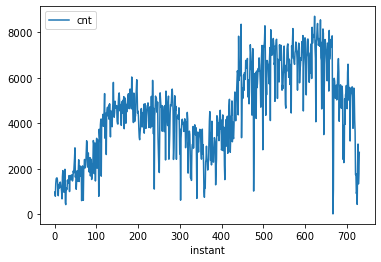

In [7]:
## The following plot shows the distribution of total bike rentals over a period of two years, i.e., 2018 and 2019 respectively.


plt.figure(figsize=(100,50))
bike.plot.line(x='instant', y='cnt')

#### Interpreting plotline:
1. The instant variable is useful in understanding how data is distributed on day to day basis.
2. It can be seen that data that the demand for bike rentals have increased as we progress from year 0 to year 1.
3. The Fall month around August and September seems to be better in year 1, while the bike rentals are highest around mid of the year, i.e., June for the year 0.

In [8]:
# Dropping the instant column as it represents daily log of how things infold over two year period 
# and also not showing good linear relatioship with "cnt" variable

bike.drop("instant", inplace=True, axis=1)

### Visualizing Numerical Variables
#### Pairplot

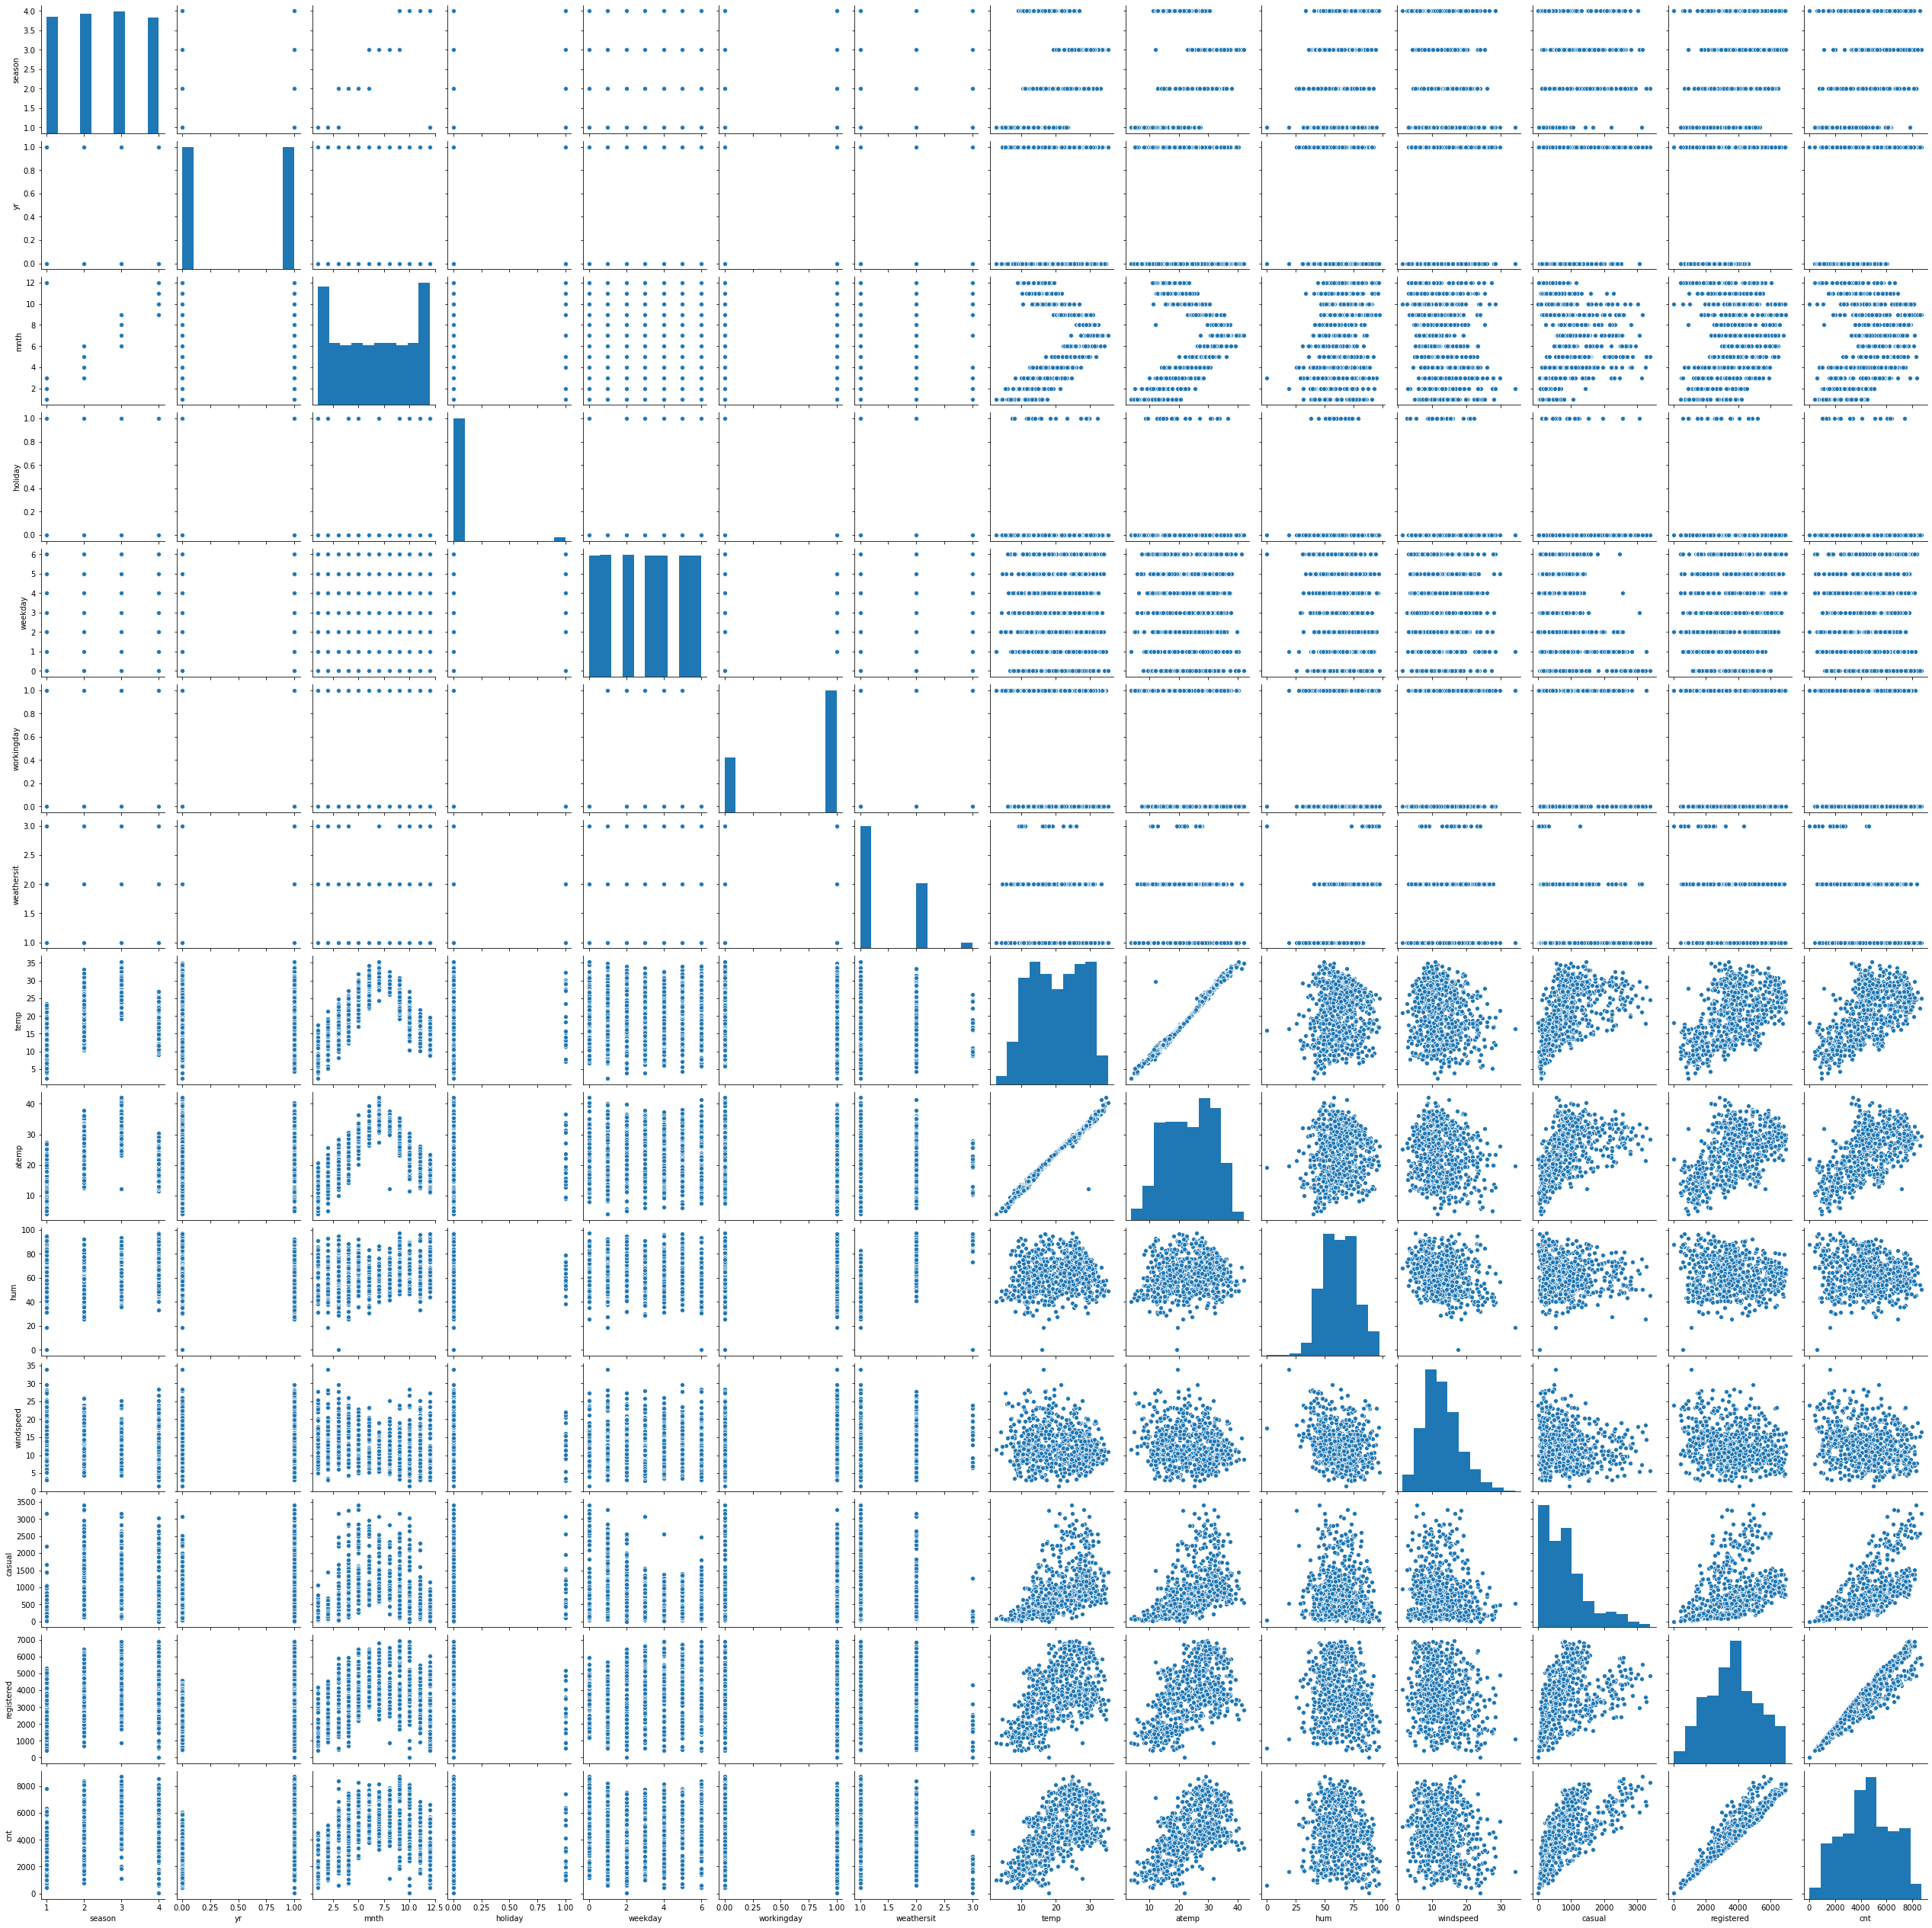

In [9]:
sns.pairplot(bike)
plt.show()

#### Interpreting pairplots:
1. The independent variable "atemp" and "temp" are showing high correlation with each other and with the target variable "cnt". One of these variables will have to dropped as we progress in this assignment as the high correlation among each other defies the basic assumptions of multiple linear regression.
2. The windspeed and hum variables are somewhat correlated to target variable "cnt"
3. The extremely high correlation of casual and registered variable has to be ignored because these two add up to become target variable "cnt". 

### Preparing data for ease of visualizing categorical variables

In [10]:
# Converting the season into categorical string values

bike["season"] = bike["season"].replace(1, "spring")
bike["season"] = bike["season"].replace(2, "summer")
bike["season"] = bike["season"].replace(3, "fall")
bike["season"] = bike["season"].replace(4, "winter")


In [11]:
# Converting the weathersit into categorical string values

bike["weathersit"] = bike["weathersit"].replace(1, "clear/partly cloudy")
bike["weathersit"] = bike["weathersit"].replace(2, "misty")
bike["weathersit"] = bike["weathersit"].replace(3, "light rain/light snow")
bike["weathersit"] = bike["weathersit"].replace(4, "Heavy rain/heavy snow")

In [12]:
# Converting the mnth into categorical string values

bike["mnth"] = bike["mnth"].replace(1, "january")
bike["mnth"] = bike["mnth"].replace(2, "february")
bike["mnth"] = bike["mnth"].replace(3, "march")
bike["mnth"] = bike["mnth"].replace(4, "april")
bike["mnth"] = bike["mnth"].replace(5, "may")
bike["mnth"] = bike["mnth"].replace(6, "june")
bike["mnth"] = bike["mnth"].replace(7, "july")
bike["mnth"] = bike["mnth"].replace(8, "august")
bike["mnth"] = bike["mnth"].replace(9, "september")
bike["mnth"] = bike["mnth"].replace(10, "october")
bike["mnth"] = bike["mnth"].replace(11, "november")
bike["mnth"] = bike["mnth"].replace(12, "december")

### Visualizing Categorical Variables
#### Boxplot-1

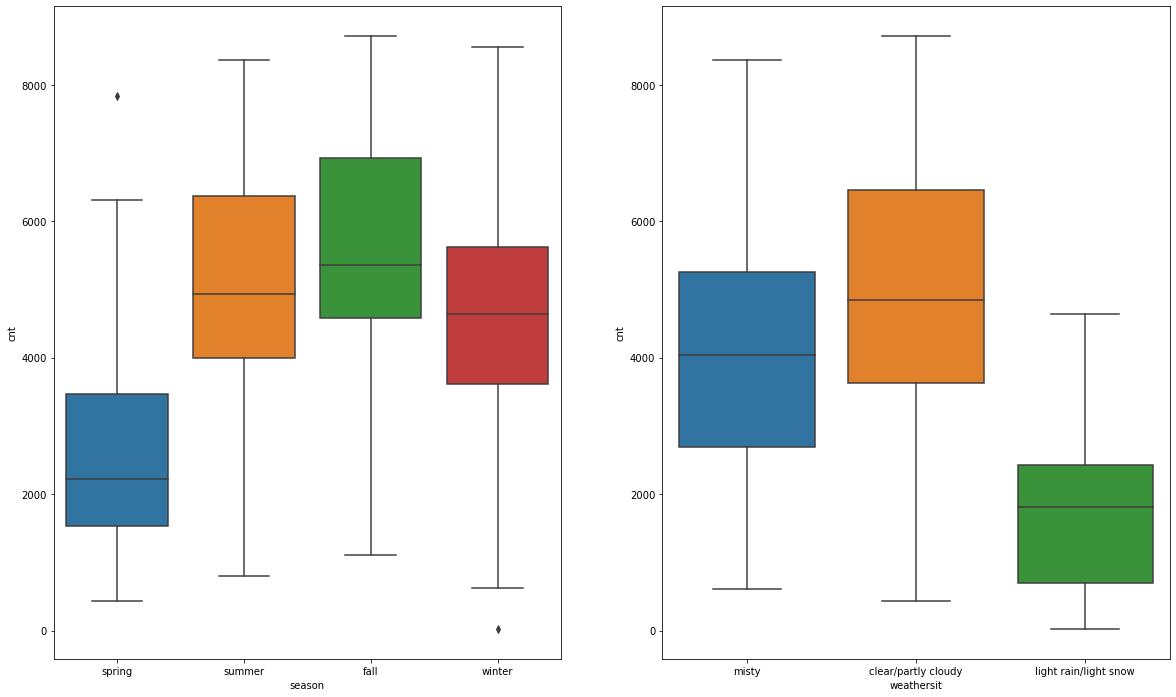

In [13]:
# Visualizing boxplots

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

#### Inferences from Boxplot 1:

1. Spring season is seeing the lowest bike share bookings in the total ride shares (i.e., casual + registered)
2. Fall season is little higher in terms of median value compared to both summer and winter seasons, which have similar median values.
3. Customers are booking more during the clear/party cloudy days compared to misty days.
4. The biggest drop of customers can be seen during light rain/light snow.

#### Boxplot-2

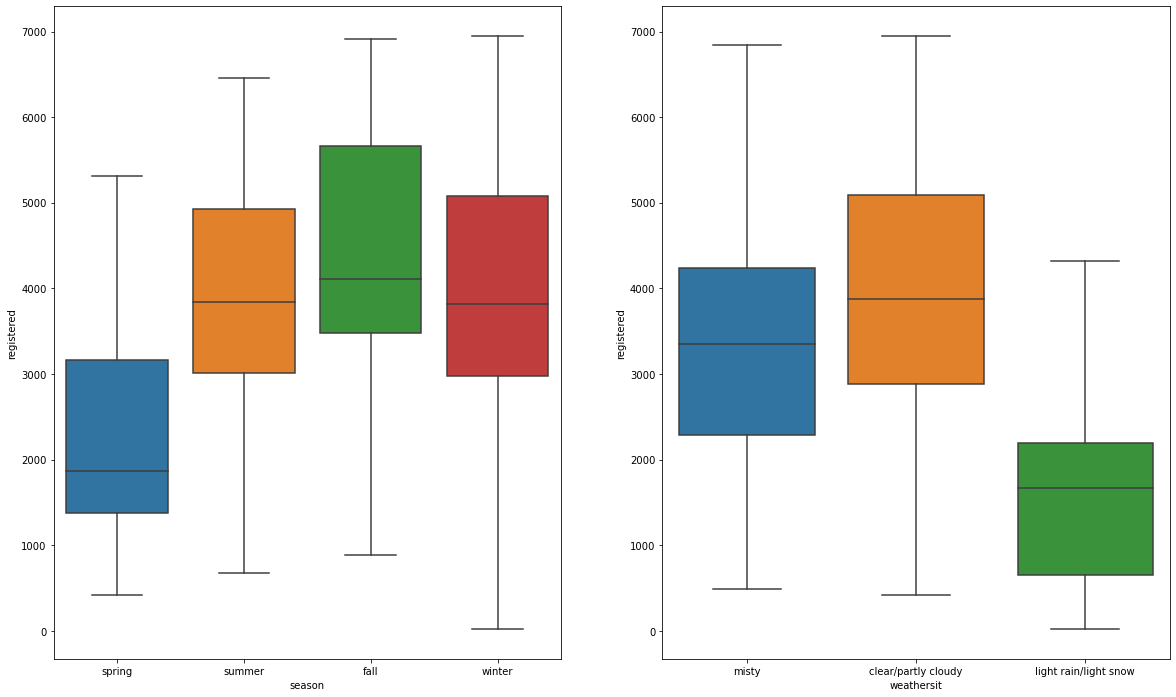

In [14]:
# Visualizing boxplots

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'registered', data = bike)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'registered', data = bike)
plt.show()

#### Inferences from Boxplot 2:

1. Spring season is seeing the lowest bike share bookings in the registered customers (pattern is similar as above)
2. Fall season is almost similar in median value with summer and winter seasons
3. Customers are booking more during the clear/party cloudy days compared to misty days.
4. The registered customers are proactive to pick up bikes from the bike docks during light rain/light snow.

#### Boxplot-3

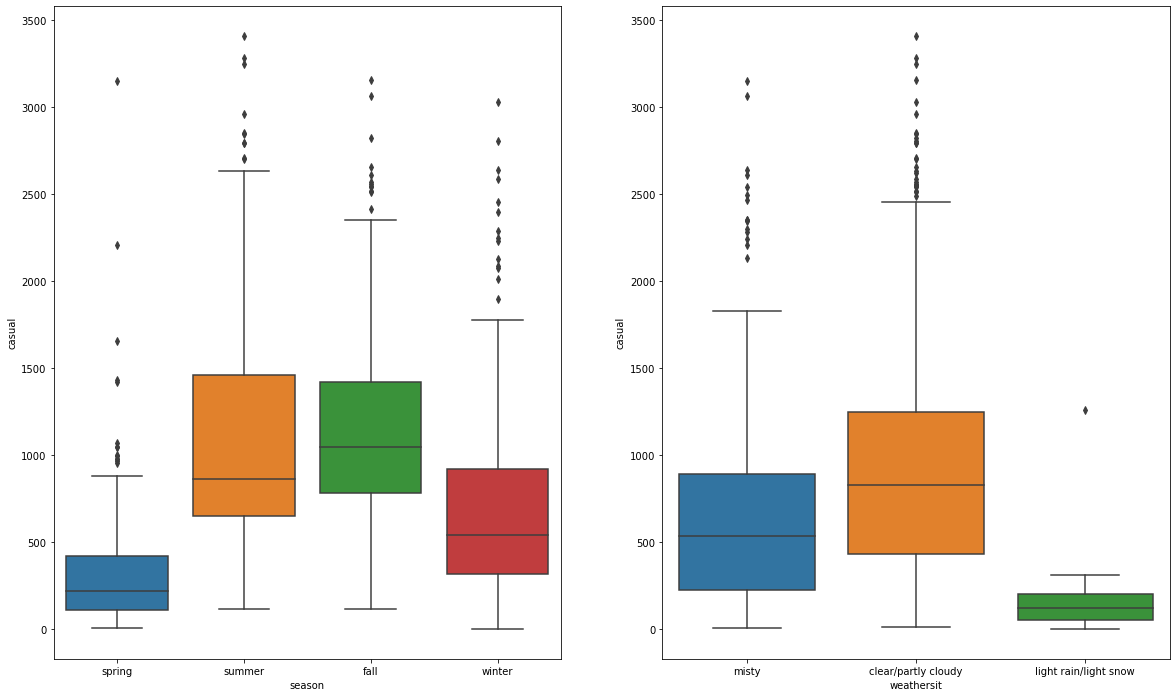

In [15]:
# Visualizing boxplots

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'casual', data = bike)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'casual', data = bike)
plt.show()

#### Inferences from Boxplot 3:

1. Spring season is seeing the least bike rents among casual riders
2. Fall season is almost similar in median value with summer while winter season is showing signs of lower bike rents with low median value compared to their registered counterparts 
3. Customers are booking more during the clear/party cloudy days compared to misty days.
4. The casual customers are least interested to rent bikes from the docks during light rain/light snow days.

#### Visualizing Bike Rental Tally per month

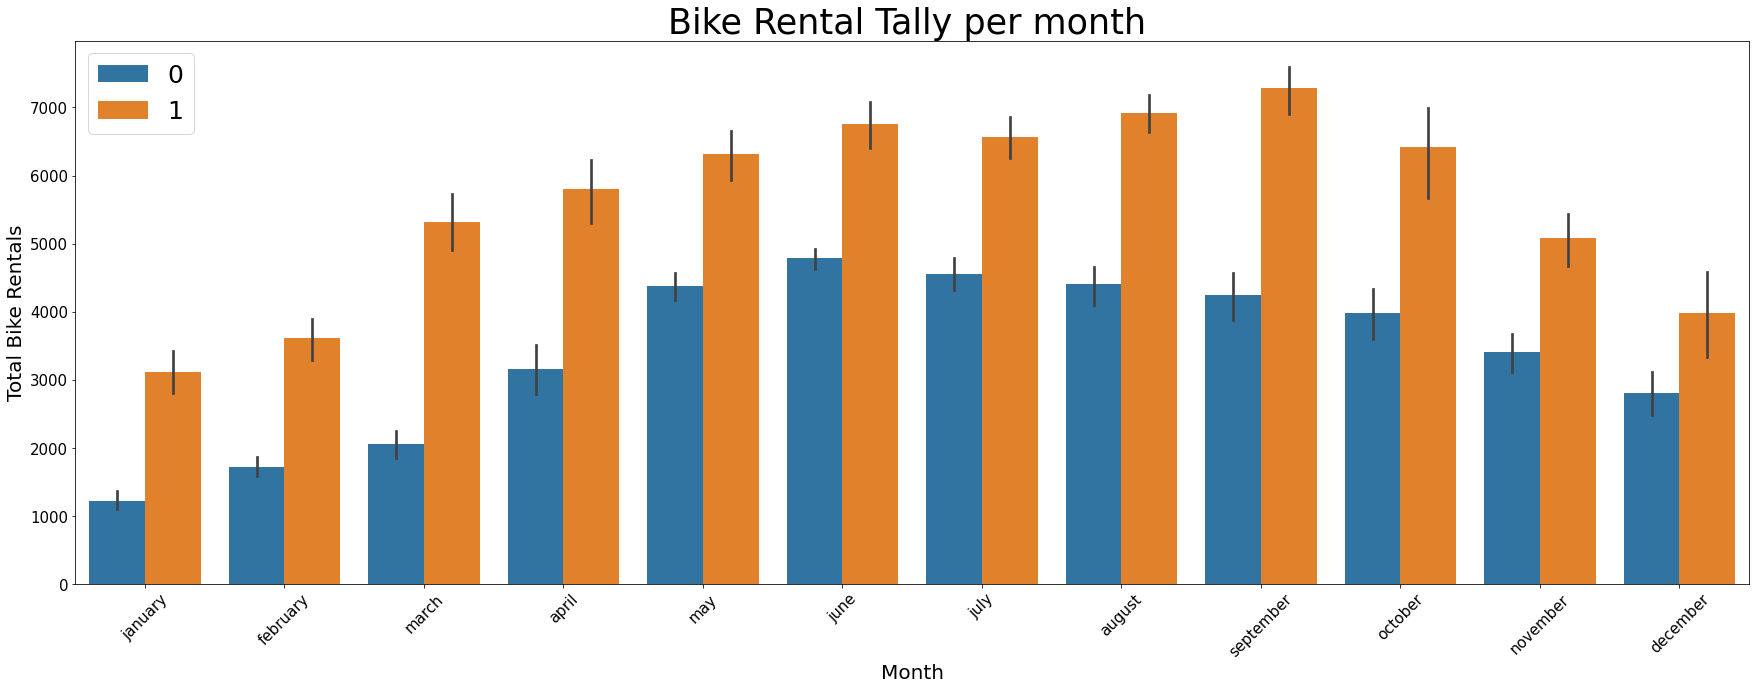

In [16]:
plt.figure(figsize=(30,10))
ax= sns.barplot(x=bike["mnth"], y=bike["cnt"], hue=bike["yr"])
plt.title("Bike Rental Tally per month ", size=35)
plt.xlabel("Month", size=20)
plt.ylabel("Total Bike Rentals", size=20)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15,rotation=0)
plt.legend(loc=2, prop={'size': 25})
plt.show()

#### Interpreting Barplot
1. 0 as per the legend signifies the year - 2018, whereas 1 signifies year - 2019
2. For year 2019: September ranks 1st, followed by June and August in terms of total bike rentals
3. For year 2018: June ranks 1st, with gradual decrease as we move to the end of the year

## Step 3: Data Preparation

### Dummy Variables

- The purpose of dummy variables are to analyse the various subgroups or levels within a categorical variable
- These dummy variables will act as indicators within the specified categorical variable

#### Variable-Season : Dummy Creation

In [17]:
# The season column has 4 levels and we will create a new dataframe called season_status 

season_status = pd.get_dummies(bike['season'])
season_status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We don't need four columns. We will drop the `fall` column, as season can be identified with remaining 3 columns where — 
- `100` will correspond to `spring`
- `011` will correspond to `summer`
- `001` will correspond to `winter`

In [18]:
# Dropping the first column, i.e., fall subgroup of season variable

season_status = pd.get_dummies(bike['season'], drop_first = True)

In [19]:
# Concatening season_status and the existing dataframe of bike along the column

bike = pd.concat([bike, season_status], axis = 1)

In [20]:
# Dropping season column as we have found allocated the dummy variables as its replacement

bike.drop(['season'], axis = 1, inplace = True)

In [21]:
bike.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,01-01-2018,0,january,0,1,1,misty,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,02-01-2018,0,january,0,2,1,misty,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,03-01-2018,0,january,0,3,1,clear/partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,04-01-2018,0,january,0,4,1,clear/partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,05-01-2018,0,january,0,5,1,clear/partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


####  Variable-weathersit: Dummy Creation

In [22]:
# The weathersit column has 3 levels and we will create a new dataframe called weather_status 

weather_status = pd.get_dummies(bike['weathersit'])
weather_status.head()

,clear/partly cloudy,light rain/light snow,misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


We don't need three columns. We will drop the `clear/partly cloudy` column, as weather can be identified with remaining 2 columns where — 
- `10` will correspond to `light rain/light snow`
- `01` will correspond to `misty`


In [23]:
# Dropping the first column, i.e., fall subgroup of weathersit variable

weather_status = pd.get_dummies(bike['weathersit'], drop_first = True)

In [24]:
# Concatening weather_status and the existing dataframe of bike along the column

bike = pd.concat([bike, weather_status], axis = 1)

In [25]:
bike.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light rain/light snow,misty
0,01-01-2018,0,january,0,1,1,misty,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,02-01-2018,0,january,0,2,1,misty,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,03-01-2018,0,january,0,3,1,clear/partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,04-01-2018,0,january,0,4,1,clear/partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,05-01-2018,0,january,0,5,1,clear/partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [26]:
# Dropping weathersit column as we have found allocated the dummy variables as its replacement

bike.drop(['weathersit'], axis = 1, inplace = True)

In [27]:
bike.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light rain/light snow,misty
0,01-01-2018,0,january,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,02-01-2018,0,january,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,03-01-2018,0,january,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,04-01-2018,0,january,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,05-01-2018,0,january,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


####  mnth-weathersit: Dummy Creation

In [28]:
# The mnth column has 12 levels and we will create a new dataframe called weather_status 

month_status = pd.get_dummies(bike['mnth'])
month_status.head()

,april,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


We don't need twelve columns. We will drop the `april` column, as weather can be identified with remaining 11 columns where — 
- `10000000000` will correspond to `august`
- `01000000000` will correspond to `december`
- `00100000000` will correspond to `february`
- `00010000000` will correspond to `january`
- `00001000000` will correspond to `july`
- `00000100000` will correspond to `june`
- `00000010000` will correspond to `march`
- `00000001000` will correspond to `may`
- `00000000100` will correspond to `november`
- `00000000010` will correspond to `october`
- `00000000001` will correspond to `september`



In [29]:
# Dropping the first column, i.e., fall subgroup of mnth variable

month_status = pd.get_dummies(bike['mnth'], drop_first = True)

In [30]:
# Concatening month_status and the existing dataframe of bike along the column

bike = pd.concat([bike, month_status], axis = 1)

In [31]:
# Dropping mnth column as we have found allocated the dummy variables as its replacement

bike.drop(['mnth'], axis = 1, inplace = True)

In [32]:
bike.head()

,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,december,february,january,july,june,march,may,november,october,september
0,01-01-2018,0,0,1,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,0,0,2,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,0,0,3,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,0,0,4,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,0,0,5,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# Dropping casual, registered and dteday to have better data readability as these variables will not be used in the coming segments

bike.drop(["casual", "registered", "dteday"], inplace=True, axis=1)

In [34]:
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,december,february,january,july,june,march,may,november,october,september
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets


#### First, we will divide the data into train and test sets in 70:30 ratio

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescalling the features

- We will use MinMaxScaler to bring the variables of varying degrees of magnitude under the range of (0,1)

In [36]:
# Importing the required libraries

from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,december,february,january,july,june,march,may,november,october,september
653,1,0,3,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,3,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# checking the shape of the dataframe

df_train.shape

(510, 25)

In [41]:
# checking the statistical summary of the dataframe

df_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,december,february,january,july,june,march,may,november,october,september
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,2.950980,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,1.977166,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


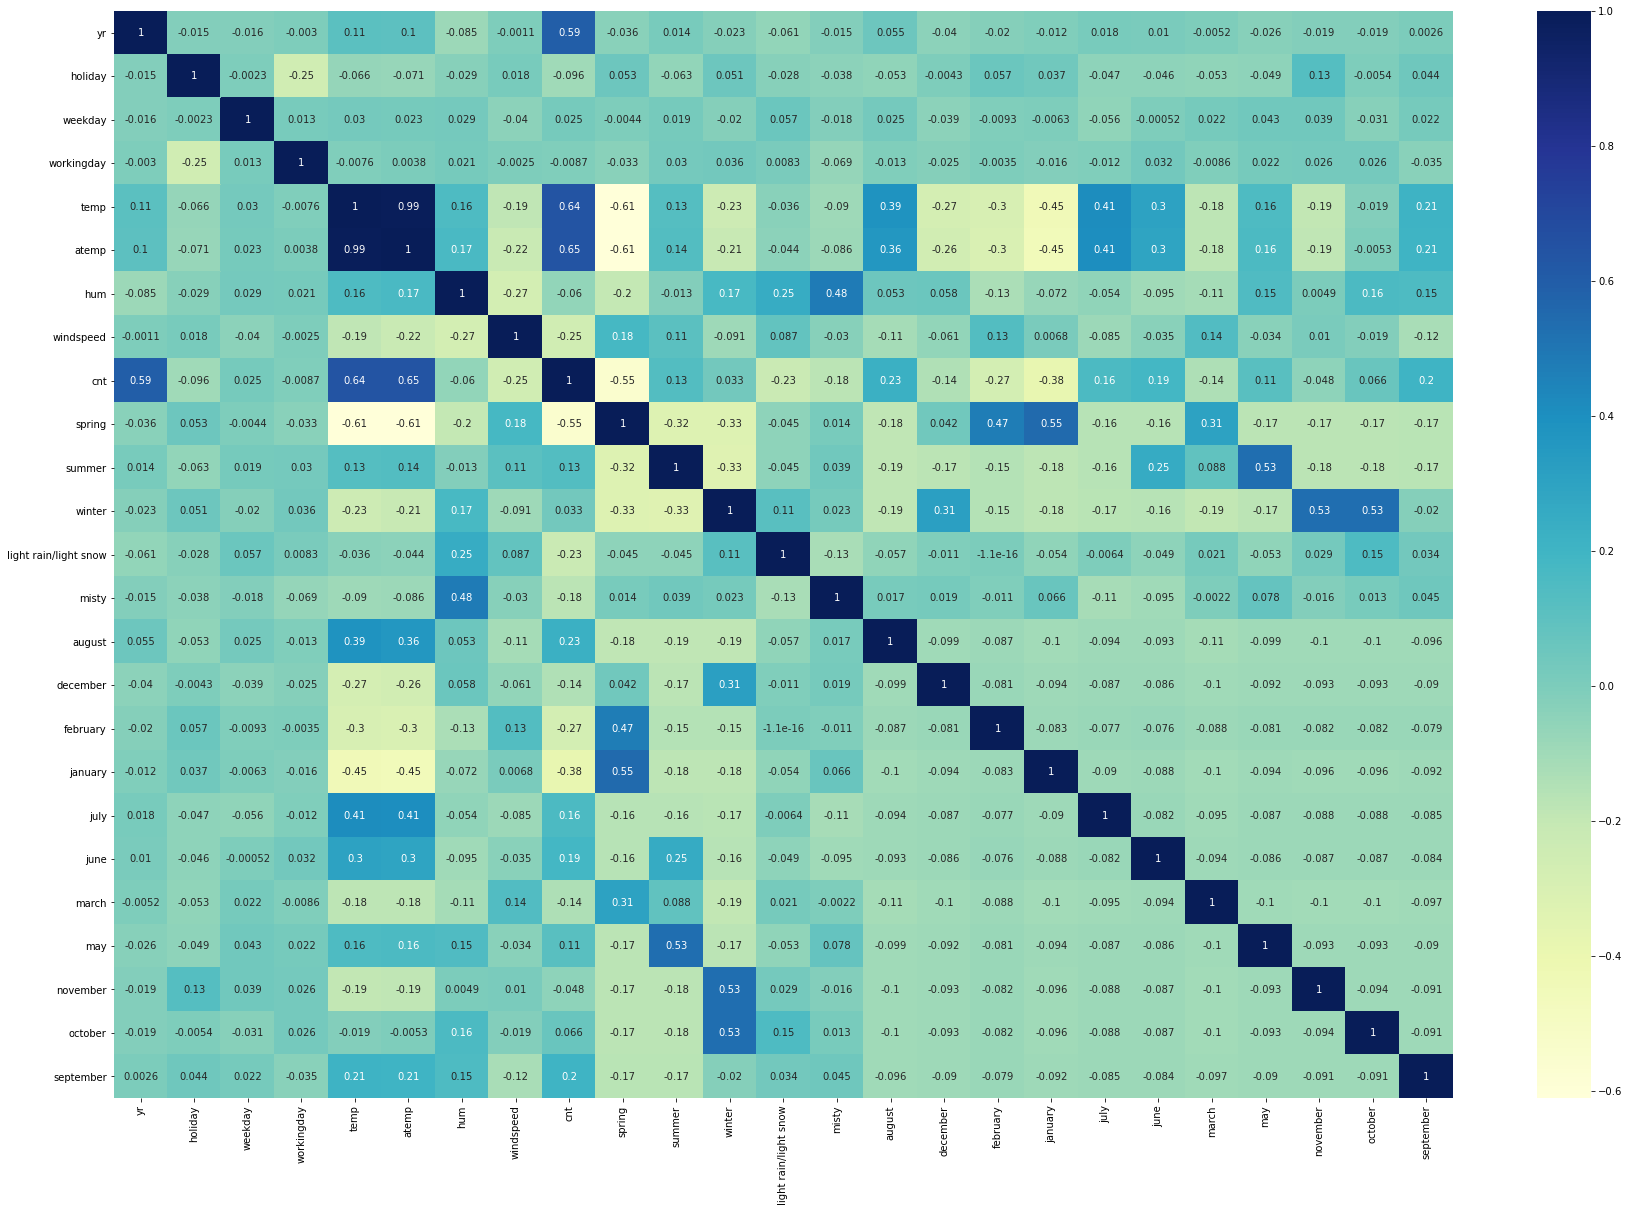

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Interpretation
1. 'yr' seems to be the most correlated with cnt but because it is a categorical data, we will choose the next most correlated value, i.e., atemp
2. atemp and temp are highly correlated and we will have to drop on of them during feature elimination method during model building step.


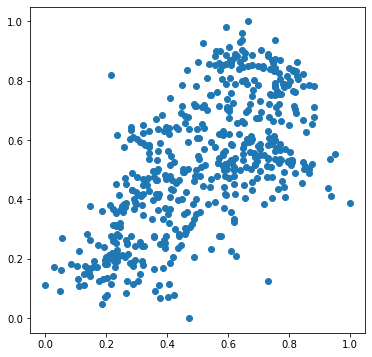

In [43]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X & Y sets for model buidling

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Buidling a linear model

#### We will see two ways of feature selection:

#### Forward Selection: 
- We start with null model and add variables one at a time. The most highly correlated variable is first selected, after that we add on second most correlated variable and so on.

#### Backward Selection:

- We start with all the variables and remove variables one at a time. The variables which are highly insignificant (high p-values) and showing high multicollinearity variable are first selected and removed, after that we add on second most insignificant variable and so on. It is reverse of forward selection


### Forward Selection

### Model 1

In [45]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [46]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

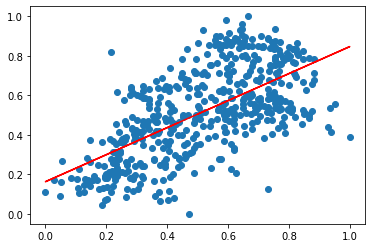

In [47]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162924 + 0.683633*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [48]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.10e-61
Time:                        16:45:27   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

#### Interpretations:
1. The p-values of the feature is 0.000, which means, it is highly significant.
2. The coefficient signifies that it is positivitely correlated to the target variable - "cnt"

### Model 2: 
### Adding another variable

The R-squared value obtained is `0.418`. 
- We will keep on adding more variables to get better predicted model.
- Let's add variable - "yr" to see how it affects the summary statistics 

In [49]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr']]

In [50]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [51]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.07e-131
Time:                        16:45:28   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

#### Interpretations:
1. The p-values of features are 0.000, which means, they are highly significant.
2. The coefficient signifies that they are positivitely correlated to the target variable - "cnt"

### Model 3:
### Adding another variable

The R-squared value obtained is `0.69`. 
- We will keep on adding more variables to get better predicted model.
- Let's add variable - "august" to see how it affects the summary statistics 

In [52]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr', 'august']]

In [53]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.069995
atemp     0.631624
yr        0.237949
august   -0.012830
dtype: float64

In [54]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     386.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.36e-130
Time:                        16:45:28   Log-Likelihood:                 342.08
No. Observations:                 510   AIC:                            -676.2
Df Residuals:                     506   BIC:                            -659.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0700      0.015      4.559      0.0

#### Interpretations:
1. The p-values of two features are 0.000, which means, they are highly significant but p-value of august is 0.522, which means it is highly insignificant variable. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)
2. The coefficient signifies that they are positivitely correlated to the target variable - "cnt"


### Model 4:
### Adding another variable

The R-squared value obtained is `0.69.
- We will keep on adding more variables to get better predicted model.
- Let's add variable - "june" to see how it affects the summary statistics
- We will drop insignificant variable - august from the model

In [55]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr', 'june']]

In [56]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072893
atemp    0.622573
yr       0.237895
june     0.007250
dtype: float64

In [57]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.75e-130
Time:                        16:45:29   Log-Likelihood:                 341.92
No. Observations:                 510   AIC:                            -675.8
Df Residuals:                     506   BIC:                            -658.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0729      0.015      4.798      0.0

#### Interpretations:
1. The p-values of two features are 0.000, which means, they are highly significant but p-value of june is 0.741, which means it is highly insignificant variable. (Note: As per industry standards, p-value must be lower than 0.05 to be called significant)
2. The coefficient signifies that they are positivitely correlated to the target variable - "cnt"

### Drawbacks of forward selection
1. If there are too many feature in the dataframe, modeling becomes difficult because, high correlated variables don't always means higher significance. 
2. We will now see how backward selection comes to our help for model building

### Backward Selection

#### Model 1:

#### Adding all the variables at once

In [58]:
# Check all the columns of the dataframe

bike.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter',
       'light rain/light snow', 'misty', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september'],
      dtype='object')

In [59]:
#Build the first linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    0.335755
yr                       0.231353
holiday                 -0.101908
weekday                  0.002404
workingday              -0.019582
temp                     0.396507
atemp                    0.056731
hum                     -0.161568
windspeed               -0.183355
spring                  -0.048545
summer                   0.039738
winter                   0.106730
light rain/light snow   -0.250558
misty                   -0.058648
august                   0.020379
december                -0.042751
february                -0.031724
january                 -0.059439
july                    -0.038417
june                     0.000172
march                    0.004156
may                      0.025495
november                -0.041007
october                  0.006785
september                0.085627
dtype: float64

In [60]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     113.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.00e-182
Time:                        16:45:30   Log-Likelihood:                 520.64
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     485   BIC:                            -885.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Checking Multicollinearity: High VIF

#### General Rule of Thumb as prescribed by industry standards:
1. VIF≥ 5: Highly Correlated and variable should be treated
2. 1>VIF>5: Medium Correlated, but acceptable
3. VIF = 1 : Not Correlated

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,437.22
5,atemp,381.99
6,hum,37.95
10,winter,11.72
8,spring,11.72
9,summer,6.79
22,october,6.38
21,november,6.09
13,august,5.94
7,windspeed,5.34


#### Model 2

#### Dropping one variable at a time

In [63]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of june is showing high p-value of 0.995 signfies that the feature is insignificant.


X = X_train.drop('june', 1,)

In [64]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     118.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.34e-183
Time:                        16:45:31   Log-Likelihood:                 520.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     486   BIC:                            -891.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [66]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,394.36
5,atemp,374.50
6,hum,37.95
10,winter,11.69
8,spring,11.60
9,summer,6.47
20,november,5.77
21,october,5.71
7,windspeed,5.31
16,january,5.17


#### Model 3

#### Dropping one variable at a time

In [67]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of march is showing high p-value of 0.861 signfies that the feature is insignificant.

X = X.drop('march', 1,)

In [68]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.70e-184
Time:                        16:45:31   Log-Likelihood:                 520.63
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     487   BIC:                            -897.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [70]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,392.46
5,atemp,374.38
6,hum,35.85
10,winter,10.33
8,spring,7.34
9,summer,6.40
7,windspeed,5.26
20,october,4.79
19,november,4.78
3,workingday,3.72


#### Model 4

#### Dropping one variable at a time

In [71]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of october is showing high p-value of 0.893 signfies that the feature is insignificant.

X = X.drop('october', 1,)

In [72]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     130.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.97e-185
Time:                        16:45:32   Log-Likelihood:                 520.62
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     488   BIC:                            -904.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [74]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,392.17
5,atemp,373.98
6,hum,34.28
8,spring,7.32
10,winter,5.98
9,summer,5.81
7,windspeed,5.17
3,workingday,3.72
2,weekday,3.25
13,august,3.13


#### Model 5:
#### Dropping one variable at a time

In [75]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of june is showing high p-value of 0.441 signfies that the feature is insignificant.

X = X.drop('august', 1,)

In [76]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.62e-186
Time:                        16:45:33   Log-Likelihood:                 520.31
No. Observations:                 510   AIC:                            -998.6
Df Residuals:                     489   BIC:                            -909.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [78]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,381.39
5,atemp,371.17
6,hum,32.70
8,spring,5.67
7,windspeed,5.12
10,winter,4.26
3,workingday,3.72
9,summer,3.55
2,weekday,3.25
15,january,2.39


#### Model 6
#### Dropping one variable at a time

In [79]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of temp is showing high collinearity of VIF= 381.39. The correlation coefficient among the variables is 0.99.
# We are removing temp even though it has good p-value due to the fact that atemp has better correlation coefficient with target variable "cnt" as can be seen from heatmap

X = X.drop('temp', 1,)

In [80]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.58e-185
Time:                        16:45:34   Log-Likelihood:                 515.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     490   BIC:                            -906.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [82]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,32.03
4,atemp,18.66
7,spring,5.39
6,windspeed,4.70
9,winter,3.97
3,workingday,3.71
8,summer,3.32
2,weekday,3.22
14,january,2.39
11,misty,2.36


#### Model 7:
#### Dropping variables one at a time

In [83]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of august is showing high p-value of 0.591 signfies that the feature is insignificant.

X = X.drop('summer', 1,)

In [84]:
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.33e-186
Time:                        16:45:35   Log-Likelihood:                 515.60
No. Observations:                 510   AIC:                            -993.2
Df Residuals:                     491   BIC:                            -912.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

In [86]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,28.41
4,atemp,17.86
7,spring,4.27
6,windspeed,4.08
3,workingday,3.68
2,weekday,3.20
8,winter,3.13
13,january,2.39
10,misty,2.33
0,yr,2.07


#### Model 8:
#### Dropping variables one at a time

In [87]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of summer is showing high p-value of 0.171 signfies that the feature is insignificant.

X = X.drop('weekday', 1,)

In [88]:
# Build a ninth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [89]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.60e-187
Time:                        16:45:36   Log-Likelihood:                 514.63
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     492   BIC:                            -917.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

In [90]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.02
3,atemp,17.46
6,spring,4.24
5,windspeed,4.07
2,workingday,3.67
7,winter,3.13
12,january,2.38
9,misty,2.33
0,yr,2.07
11,february,1.92


#### Model 9:
#### Dropping variables one at a time

In [91]:
# Dropping highly correlated variables and insignificant variables

# The feature variable hum has high multicollinearity of VIF= 28.02 and currently as per statistical summary of this model, we do not have any insignificant p-values


X = X.drop('hum', 1,)

In [92]:
# Build a tenth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.61e-184
Time:                        16:45:36   Log-Likelihood:                 506.23
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     493   BIC:                            -906.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [94]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,6.19
4,windspeed,4.05
5,spring,3.86
2,workingday,3.51
6,winter,2.72
11,january,2.23
0,yr,2.07
10,february,1.89
14,november,1.83
8,misty,1.55


#### Model 10:
#### Dropping variables one at a time

In [95]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of may is showing high p-value of 0.145 signfies that the feature is insignificant.

X = X.drop('may', 1,)

In [96]:
# Build a eleventh fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [97]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.47e-185
Time:                        16:45:38   Log-Likelihood:                 505.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     494   BIC:                            -910.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [98]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,5.87
4,windspeed,4.05
5,spring,3.79
2,workingday,3.50
6,winter,2.63
11,january,2.22
0,yr,2.06
10,february,1.89
13,november,1.82
9,december,1.55


#### Model 11:
#### Dropping variables one at a time

In [99]:
# Dropping highly correlated variables and insignificant variables

# We will remove "windspeed" which has 2nd highest VIF value. 
# We are not removing "atemp" because the correlation coefficient of windspeed vs. cnt was -0.25 (which is considerably good) 
# but correlation coefficient of atemp vs cnt was 0.65 (very high), hence "atemp" is an important variable here 

X = X.drop('windspeed', 1,)

In [100]:
# Build a twelveth fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.71e-179
Time:                        16:45:39   Log-Likelihood:                 488.83
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     495   BIC:                            -884.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [102]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,4.73
4,spring,3.47
2,workingday,3.42
5,winter,2.62
10,january,2.22
0,yr,2.05
9,february,1.89
12,november,1.81
8,december,1.55
7,misty,1.53


#### Model 12:
#### Dropping variables one at a time

In [103]:
# Dropping highly correlated variables and insignificant variables

# The Feature variable of february is showing high p-value of 0.101 signfies that the feature is insignificant.

X = X.drop('february', 1,)

In [104]:
# Build a twelveth fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [105]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.72e-180
Time:                        16:45:41   Log-Likelihood:                 487.45
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     496   BIC:                            -887.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [106]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,4.67
2,workingday,3.40
5,winter,2.59
4,spring,2.07
0,yr,2.05
11,november,1.79
9,january,1.66
7,misty,1.52
8,december,1.46
10,july,1.35


## Step 6: Residual analysis of the train data

In [107]:
y_train_cnt = lr_12.predict(X_train_lm)

Text(0.5, 0, 'Errors')

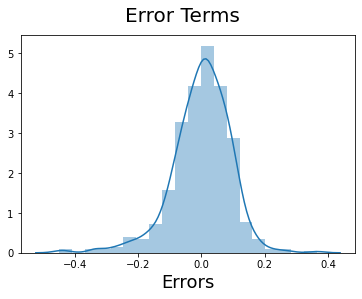

In [108]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making predictions using the final model

In [109]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [110]:
df_test.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,december,february,january,july,june,march,may,november,october,september
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,3.100457,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,2.058536,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [111]:
y_test = df_test.pop('cnt')
X_test = df_test

In [112]:
# Adding constant variable to test dataframe
X_test_m12 = sm.add_constant(X_test)

In [113]:
# Creating X_test_m12 dataframe by dropping variables from X_test_m12

X_test_m12 = X_test_m12.drop(["june", "march", "october", "august", "temp", "summer","weekday", "hum", "may", "windspeed", "february"], axis = 1)

In [114]:
# Making predictions using the twelveth model

y_pred_m12 = lr_12.predict(X_test_m12)

## Step 8: Model Evaluation


Text(0, 0.5, 'y_pred')

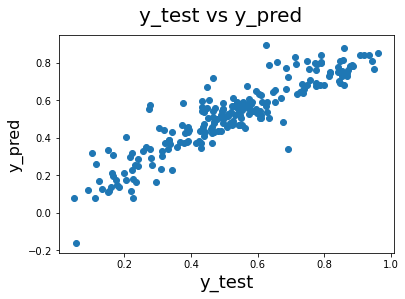

In [115]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m12)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### The equation of best fitted line is 

$ cnt = 0.2342  \times  yr - 0.1084  \times  holiday - 0.0242  \times  workingday + 0.4494 \times atemp - 0.1116 \times spring + 0.0678 \times winter - 0.3037 \times light rain/light snow - 0.0823 \times misty - 0.0438 \times december - 0.0388 \times january - 0.0601 \times july -0.0485 \times november + 0.0623 \times september $

##### r2_score Metric

In [116]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m12)

0.8262424289061039

##### The r2_score for train set is coming out to be 0.828
##### The r2_score for test set is coming out to be 0.826

The difference is coming out to be 0.828-0.826 = 0.002

#### Interpreting r2_score: Coefficient of Determination
    
An r2_score of 82.8% for train set and 82.6% for test set signifies that how much the dependent output (target variable) can be explained by one or more than one independent variables 